### 1. Install Required Packages

In [16]:
!pip install mne google-cloud-storage pandas
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 110.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 81.9 MB/s eta 0:00:00


### 2. Import Libraries

In [2]:
import os
import json
import pandas as pd
from google.cloud import storage
import mne
import matplotlib.pyplot as plt
import numpy as np

### Define Helper Functions to Read Data from Google Cloud Storage (GCS)

In [3]:
def read_tsv_from_gcs(bucket_name, blob_path):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_path)
        content = blob.download_as_string()
        return pd.read_csv(StringIO(content.decode('utf-8')), sep='\t')
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
        
def read_json_from_gcs(bucket_name, blob_path):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_path)
        content = blob.download_as_string()
        return json.loads(content.decode('utf-8'))
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
        
def read_brainvision_eeg(bucket_name, blob_path):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_path)
        content = blob.download_as_string()
        return mne.io.read_raw_brainvision(content, preload=False)
    except Exception as e:
        print(f"Error loading {blob_path}: {e}")
        return None

def read_fif_data(bucket_name, blob_path):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_path)
        content = blob.download_as_string()
        return mne.io.read_raw_fif(contet, preload=False)
    except Exception as e:
        print(f"Error loading {blob_path}: {e}")
        return None

### Define Helper Functions to download file to local

In [4]:
def download_file_from_gcs(bucket_name, blob_path, local_path):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_path)
        blob.download_to_filename(local_path)
        print(f"Downloaded {blob_path} to {local_path}")
    except Exception as e:
        print(f"Error downloading {blob_path}: {e}")

### Define Paths and Variables

In [6]:
bucket_name = "eeg-data-bucket"
local_dir = "./eeg-data/"

# Paths in GCS
decoding_score_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-decoding_score.json"
decoding_xcorr_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-decoding_xcorr.json"
vhdr_path = "sub-01/eeg/sub-01_task-daf_eeg.vhdr"
vmrk_path = "sub-01/eeg/sub-01_task-daf_eeg.vmrk"
eeg_path = "sub-01/eeg/sub-01_task-daf_eeg.eeg"
fif_path = "derivatives/PREP/sub-01/sub-01_task-daf_desc-PREP_raw.fif.gz"

audio_envelope_filters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-audioEnvelopeFilters_ave.fif.gz"
audio_envelope_patterns_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-audioEnvelopePatterns_ave.fif.gz"
audio_onset_filters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-audioOnsetsFilters_ave.fif.gz"
audio_onset_patters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-audioOnsetsPatterns_ave.fif.gz"

egg_envelope_filters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-eggEnvelopeFilters_ave.fif.gz"
egg_envelope_patterns_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-eegEnvelopePatterns_ave.fif.gz"
eeg_onset_filters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-eegOnsetsFilters_ave.fif.gz"
eeg_onset_patters_path = "derivatives/TRF/sub-01/sub-01_task-daf_desc-eegOnsetsPatterns_ave.fif.gz"


# Local paths
local_vhdr = os.path.join(local_dir, "sub-01_task-daf_eeg.vhdr")
local_vmrk = os.path.join(local_dir, "sub-01_task-daf_eeg.vmrk")
local_eeg = os.path.join(local_dir, "sub-01_task-daf_eeg.eeg")
local_fif = os.path.join(local_dir, "sub-01_task-daf_desc-PREP_raw.fif.gz")

In [6]:
# Load decoding score and cross-correlation data from GCS
decoding_score_data = read_json_from_gcs(bucket_name, decoding_score_path)
decoding_xcorr_data = read_json_from_gcs(bucket_name, decoding_xcorr_path)

# Print the contents of the JSON files
if decoding_score_data:
    print("\nDecoding Score Data (decoding_score.json):")
    for key, value in decoding_score_data.items():
        print(f"{key}: {value}")

if decoding_xcorr_data:
    print("\nDecoding Cross-Correlation Data (decoding_xcorr.json):")
    for key, value in decoding_xcorr_data.items():
        print(f"{key}: {value}")


Decoding Score Data (decoding_score.json):
audioEnvelope: 0.1729888361918419
audioOnsets: 0.06160580940417633
eggEnvelope: 0.1805627238690179
eggOnsets: 0.08239834824749231

Decoding Cross-Correlation Data (decoding_xcorr.json):
pre->post: 0.0
post->pre: -0.007142857142857143


###  Download and Load EEG Data (BrainVision Format)

Downloaded sub-01/eeg/sub-01_task-daf_eeg.vhdr to ./eeg-data/sub-01_task-daf_eeg.vhdr
Downloaded sub-01/eeg/sub-01_task-daf_eeg.vmrk to ./eeg-data/sub-01_task-daf_eeg.vmrk
Downloaded sub-01/eeg/sub-01_task-daf_eeg.eeg to ./eeg-data/sub-01_task-daf_eeg.eeg
Extracting parameters from ./eeg-data/sub-01_task-daf_eeg.vhdr...
Setting channel info structure...
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 5000.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 10000.0 Hz
>
Using matplotlib as 2D backend.


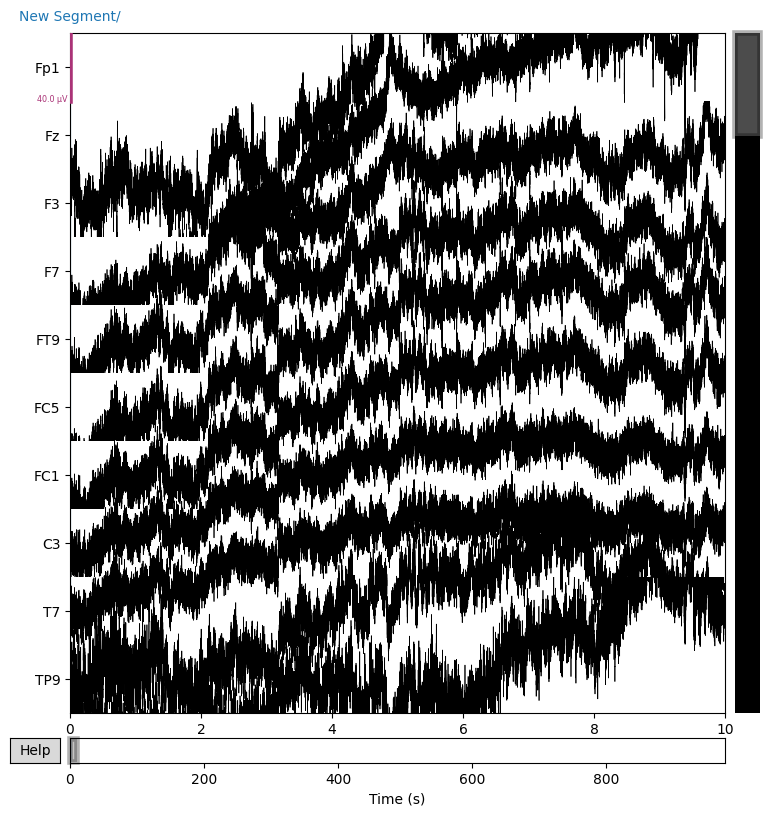

In [7]:
# Download EEG files from GCS to local directory
download_file_from_gcs(bucket_name, vhdr_path, local_vhdr)
download_file_from_gcs(bucket_name, vmrk_path, local_vmrk)
download_file_from_gcs(bucket_name, eeg_path, local_eeg)

# Load BrainVision EEG data
raw_eeg_data = mne.io.read_raw_brainvision(local_vhdr, preload=False)

# Display basic information about the loaded data
if raw_eeg_data is not None:
    print(raw_eeg_data.info)

# Plot the raw EEG data (example of plotting first 10 channels)
if raw_eeg_data is not None:
    raw_eeg_data.plot(n_channels=10, title='Raw EEG Data', show=True)

# raw_data (mne.io.Raw)
# ├── info (dictionary-like object)  
# │   ├── sfreq (float): Sampling frequency in Hz  
# │   ├── ch_names (list of str): List of channel names  
# │   ├── nchan (int): Number of channels  
# │   ├── bads (list of str): List of bad channels  
# │   ├── lowpass (float): Low-pass filter frequency  
# │   ├── highpass (float): High-pass filter frequency  
# │   ├── subject_info (dict or None): Information about the subject  
# │   ├── device_info (dict or None): Information about the recording device  
# │   ├── dig (list of dict or None): Electrode digitization information  
# │   ├── projs (list of Projection objects): SSP projections applied to the data  
# │   ├── comps (list of ICA components): Components used for ICA decomposition  
# │   ├── events (dict or None): Event information (markers)  
# │   └── other metadata (depending on the dataset)
# │
# ├── times (numpy array): Array of time points corresponding to each data sample  
# │
# ├── preload (bool): Whether the data is loaded into memory  
# │
# ├── _data (numpy array): The actual EEG data in the shape (n_channels, n_samples)
# │
# ├── annotations (mne.Annotations): Annotations (events, artifacts) with onset, duration, description
# │
# ├── events (None or array-like): Events extracted from the data
# │
# ├── plot(): Method for visualizing the raw EEG data  
# │
# ├── pick_channels(): Method for selecting specific channels  
# │
# ├── filter(): Method for filtering the data  
# │
# ├── save(): Method to save the processed data to disk  
# │
# └── Additional methods for processing, analyzing, and manipulating EEG data

### Set Channel Types and Process Data

In [7]:
print(f"default Channel Types: {raw_eeg_data.info['ch_names']}")

# Define a channel type mapping
channel_type_mapping = {
    'leog': 'eog',   # Left EOG
    'reog': 'eog',   # Right EOG
    'egg': 'ecg',    # ECG
    'audio': 'misc'  # Miscellaneous (e.g., audio signals)
}

# Update the channel types in the raw EEG data
raw_eeg_data.set_channel_types(channel_type_mapping)

# Print the updated channel types
print("\nUpdated Channel Types:")
for ch in raw_eeg_data.info['chs']:
    print(f"Channel: {ch['ch_name']}, Type: {ch['kind']}")

default Channel Types: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'leog', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'reog', 'egg', 'audio', 'Cz']

Updated Channel Types:
Channel: Fp1, Type: 2 (FIFFV_EEG_CH)
Channel: Fz, Type: 2 (FIFFV_EEG_CH)
Channel: F3, Type: 2 (FIFFV_EEG_CH)
Channel: F7, Type: 2 (FIFFV_EEG_CH)
Channel: FT9, Type: 2 (FIFFV_EEG_CH)
Channel: FC5, Type: 2 (FIFFV_EEG_CH)
Channel: FC1, Type: 2 (FIFFV_EEG_CH)
Channel: C3, Type: 2 (FIFFV_EEG_CH)
Channel: T7, Type: 2 (FIFFV_EEG_CH)
Channel: TP9, Type: 2 (FIFFV_EEG_CH)
Channel: CP5, Type: 2 (FIFFV_EEG_CH)
Channel: CP1, Type: 2 (FIFFV_EEG_CH)
Channel: Pz, Type: 2 (FIFFV_EEG_CH)
Channel: P3, Type: 2 (FIFFV_EEG_CH)
Cha

/tmp/ipykernel_9171/3274255195.py:12: RuntimeWarning: The unit for channel(s) audio has changed from V to NA.
  raw_eeg_data.set_channel_types(channel_type_mapping)


### Inspect for Bad Channels and Annotations

In [8]:
# Get the raw EEG data as a NumPy array
data = raw_eeg_data.get_data()

# Calculate the size of the data array in bytes
data_size_bytes = data.nbytes

# Convert to megabytes
data_size_mb = data_size_bytes / (1024**2)

print(f"Size of the raw EEG data: {data_size_mb:.2f} MB")

Size of the raw EEG data: 4919.33 MB


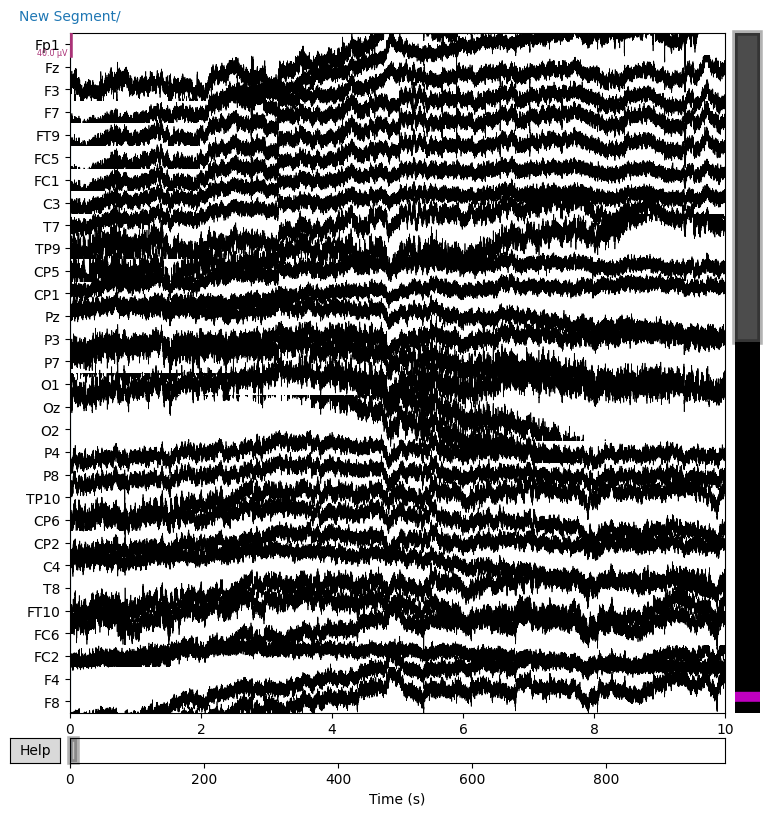

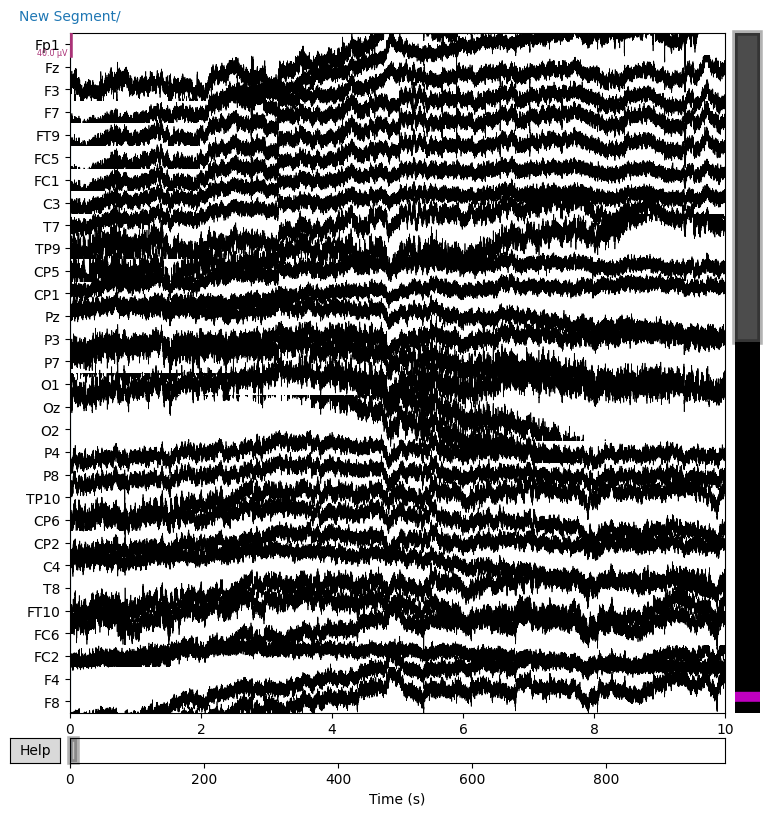

In [9]:
raw_eeg_data.plot(n_channels=30, title="Inspect EEG Data", show=True)

In [12]:
# Detect flat channels automatically
flat_channels = []
for ch_name in raw_eeg_data.ch_names:
    data = raw_eeg_data.copy().pick_channels([ch_name]).get_data()
    if np.std(data) < 1e-6:  # Threshold in microvolts (adjust as needed)
        flat_channels.append(ch_name)

print(f"Flat channels: {flat_channels}")


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [13]:
# Identify non-EEG channels (e.g., EOG, ECG)
non_eeg_channels = mne.pick_types(raw_eeg_data.info, eeg=False, eog=True, ecg=True, misc=True, stim=True, exclude=[])
channels_to_drop = [raw_eeg_data.ch_names[i] for i in non_eeg_channels]

# Drop non-EEG channels
raw_eeg_data.drop_channels(channels_to_drop)

print("\nEEG Channel Types:")
for ch in raw_eeg_data.info["chs"]:
    print(f"Channel: {ch['ch_name']}, Type: {ch['kind']}")


EEG Channel Types:
Channel: Fp1, Type: 2 (FIFFV_EEG_CH)
Channel: Fz, Type: 2 (FIFFV_EEG_CH)
Channel: F3, Type: 2 (FIFFV_EEG_CH)
Channel: F7, Type: 2 (FIFFV_EEG_CH)
Channel: FT9, Type: 2 (FIFFV_EEG_CH)
Channel: FC5, Type: 2 (FIFFV_EEG_CH)
Channel: FC1, Type: 2 (FIFFV_EEG_CH)
Channel: C3, Type: 2 (FIFFV_EEG_CH)
Channel: T7, Type: 2 (FIFFV_EEG_CH)
Channel: TP9, Type: 2 (FIFFV_EEG_CH)
Channel: CP5, Type: 2 (FIFFV_EEG_CH)
Channel: CP1, Type: 2 (FIFFV_EEG_CH)
Channel: Pz, Type: 2 (FIFFV_EEG_CH)
Channel: P3, Type: 2 (FIFFV_EEG_CH)
Channel: P7, Type: 2 (FIFFV_EEG_CH)
Channel: O1, Type: 2 (FIFFV_EEG_CH)
Channel: Oz, Type: 2 (FIFFV_EEG_CH)
Channel: O2, Type: 2 (FIFFV_EEG_CH)
Channel: P4, Type: 2 (FIFFV_EEG_CH)
Channel: P8, Type: 2 (FIFFV_EEG_CH)
Channel: TP10, Type: 2 (FIFFV_EEG_CH)
Channel: CP6, Type: 2 (FIFFV_EEG_CH)
Channel: CP2, Type: 2 (FIFFV_EEG_CH)
Channel: C4, Type: 2 (FIFFV_EEG_CH)
Channel: T8, Type: 2 (FIFFV_EEG_CH)
Channel: FT10, Type: 2 (FIFFV_EEG_CH)
Channel: FC6, Type: 2 (FIFFV_EE

### Apply Montage and Inspect Sensors

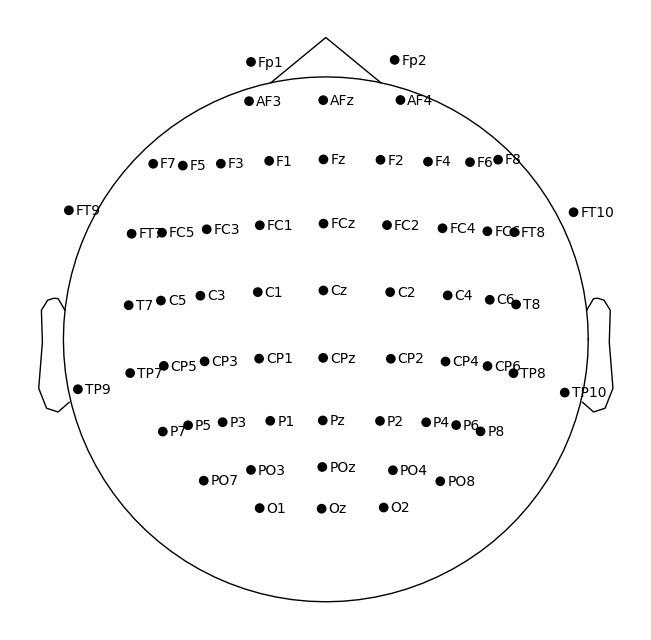

In [10]:
# Set a standard EEG montage
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg_data.set_montage(montage, on_missing='ignore')

# Plot sensor locations
raw_eeg_data.plot_sensors(kind='topomap', show_names=True)
plt.show()

In [11]:
print(raw_eeg_data.info['ch_names'])
# # Mark 'Cz' as a bad channel
# raw_eeg_data.info['bads'].append('Cz')  # Mark Cz as a bad channel

# # Drop bad channels from the dataset
# raw_eeg_data.drop_channels(raw_eeg_data.info["bads"])

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'leog', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'reog', 'egg', 'audio', 'Cz']


### Plot Power Spectral Density (PSD) and Analyze Noise

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.205 (s)
Plotting power spectral density (dB=True).
Using up to 300 segments


/tmp/ipykernel_10534/3984061847.py:4: UserWarning: Zero value in spectrum for channel Cz
  raw_eeg_data.plot_psd(fmax=100, show=True)
/tmp/ipykernel_10534/3984061847.py:4: UserWarning: Infinite value in PSD for channel Cz.
These channels might be dead.
  raw_eeg_data.plot_psd(fmax=100, show=True)


Number of samples used : 600000
[done]
<Covariance | kind : full, shape : (62, 62), range : [-8.9e-08, +4.6e-07], n_samples : 599999>
Computing rank from covariance with rank=None
    Using tolerance 2.1e-10 (2.2e-16 eps * 62 dim * 1.6e+04  max singular value)
    Estimated rank (eeg): 61
    EEG: rank 61 computed from 62 data channels with 0 projectors


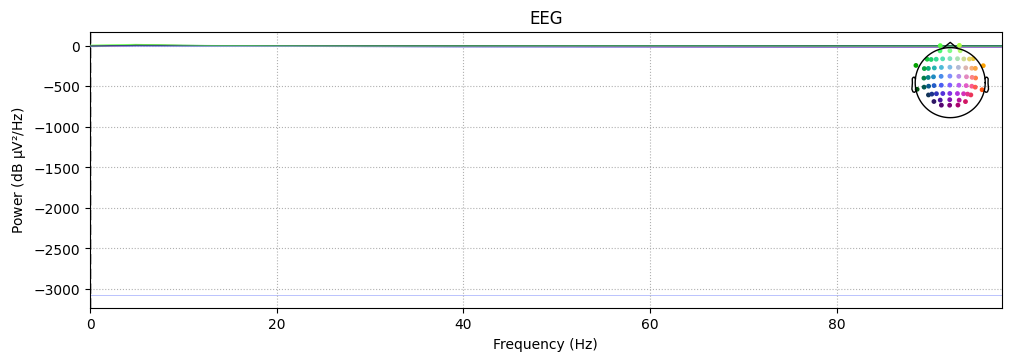

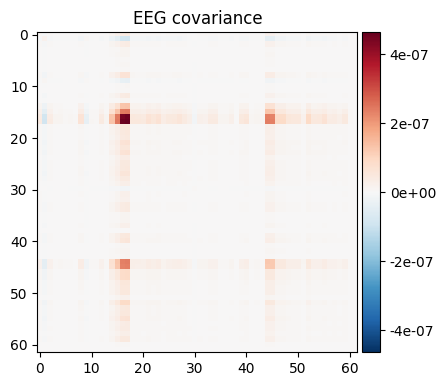

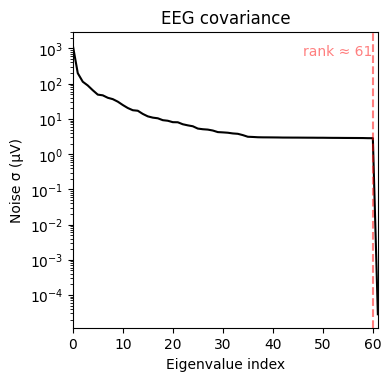

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [21]:
# Purpose: Assess the noise characteristics of your EEG data across different frequencies.
# Interpretation: Look for noise artifacts such as line noise (50/60 Hz), muscle artifacts (high frequencies), or dead channels (flat PSD).

raw_eeg_data.info['bads'].append('Cz')  # Mark Cz as a bad channel
raw_eeg_data.plot_psd(fmax=100, show=True)  # Re-plot the PSD

# Purpose: Assess the noise characteristics of your EEG data across different frequencies.
# Interpretation: Look for noise artifacts such as line noise (50/60 Hz), muscle artifacts (high frequencies), or dead channels (flat PSD).
cov = mne.compute_raw_covariance(raw_eeg_data, tmin=0, tmax=60)  # First 60 seconds as noise estimate
print(cov)

# Visualize the covariance matrix
mne.viz.plot_cov(cov, raw_eeg_data.info)

###  Inspect for Bad Channels and Annotations

In [22]:
# Mark 'Cz' as a bad channel
raw_eeg_data.info["bads"].append("Cz")

# Drop bad channels from the dataset
raw_eeg_data.drop_channels(raw_eeg_data.info["bads"])

<RawBrainVision | sub-01_task-daf_eeg.eeg, 61 x 9769500 (976.9 s), ~4.44 GB, data loaded>

<Annotations | 1 segment: New Segment/ (1)>


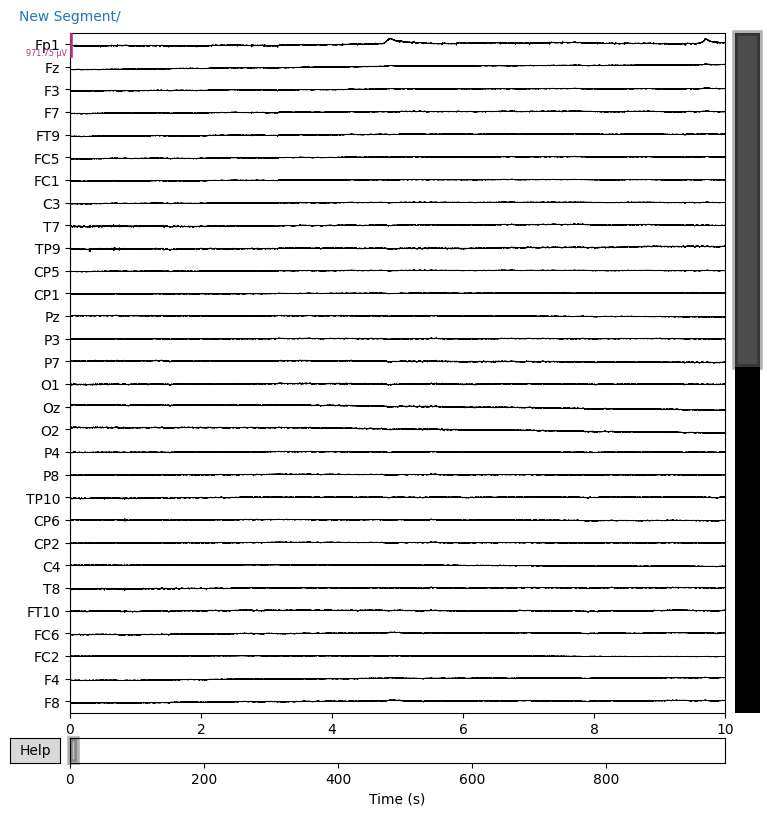

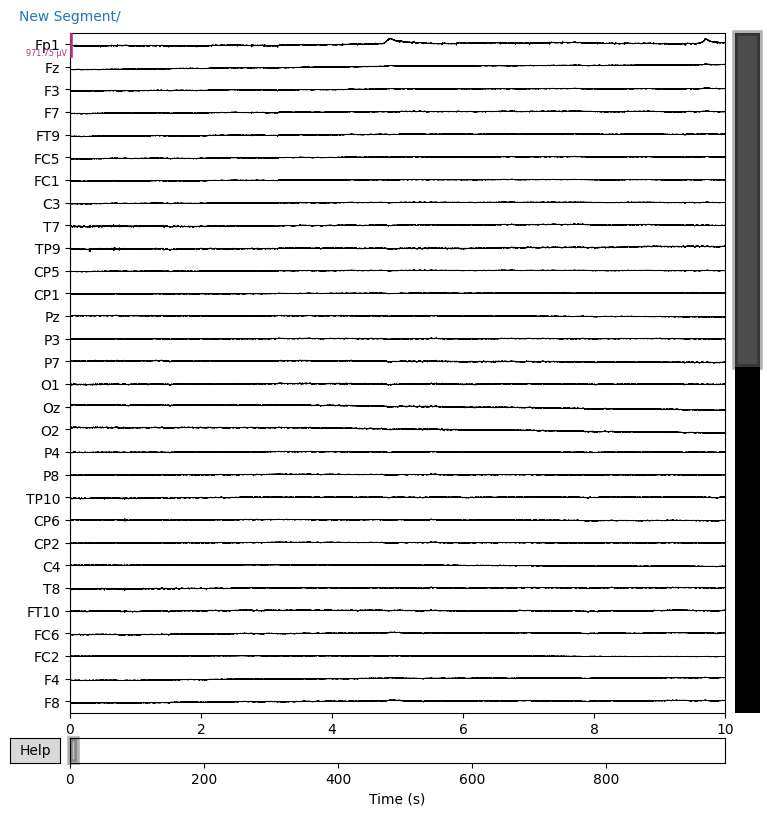

In [23]:
# Print annotations (e.g., events or artifacts)
print(raw_eeg_data.annotations)

# Plot data to inspect for gaps or missing segments
raw_eeg_data.plot(duration=10, n_channels=30, scalings='auto', title='Inspecting for Gaps')

In [16]:
download_file_from_gcs(bucket_name, fif_path, local_fif)

Downloaded derivatives/PREP/sub-01/sub-01_task-daf_desc-PREP_raw.fif.gz to ./eeg-data/sub-01_task-daf_desc-PREP_raw.fif.gz


### fif(prep) data

In [8]:
# Load the raw FIF file
raw_fif = mne.io.read_raw_fif('./eeg-data/sub-01_task-daf_desc-PREP_raw.fif.gz', preload=False)

# Print a summary of the contents
print(raw_fif.info)

Opening raw data file ./eeg-data/sub-01_task-daf_desc-PREP_raw.fif.gz...
    Range : 0 ... 976949 =      0.000 ...   976.949 secs
Ready.
<Info | 13 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, lemg, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 60 EEG, 2 EMG, 6 misc, 2 EOG
 custom_ref_applied: True
 dig: 65 items (3 Cardinal, 62 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 500.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 70
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 2 items (dict)
>


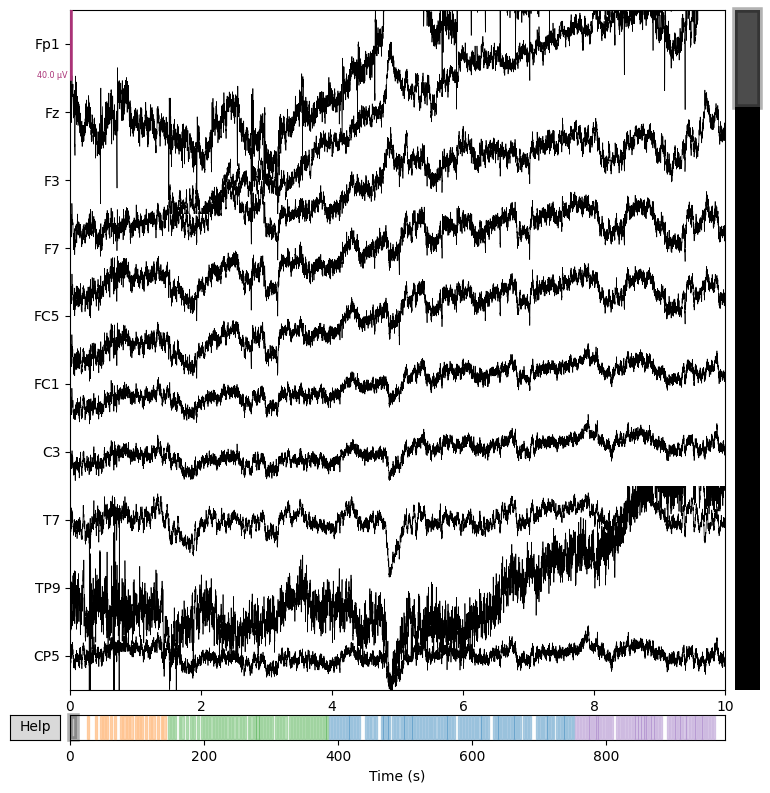

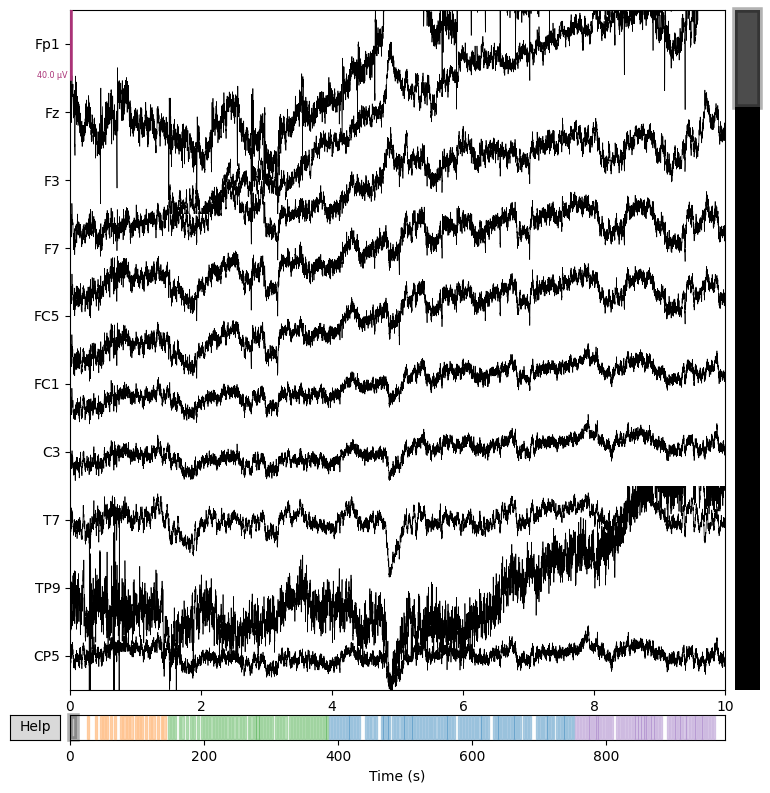

In [9]:
raw_fif.plot(n_channels=10, title='Raw EEG Data', show=True)

In [ ]:
if raw_fif.annotations:
    raw_fif.plot(duration=10, n_channels=30, title='Annotated EEG Data')

### Compare the raw-data with processed-data to explore what pre-processing done to raw-data

In [9]:
print("Preprocessed FIF Info:")
print(raw_fif.info)
print("\nRaw EEG Info:")
print(raw_eeg_data.info)

# Compare filter settings
print("\nPreprocessed FIF Filters:")
print(f"Highpass: {raw_fif.info['highpass']} Hz, Lowpass: {raw_fif.info['lowpass']} Hz")

print("\nRaw EEG Filters:")
print(f"Highpass: {raw_eeg_data.info['highpass']} Hz, Lowpass: {raw_eeg_data.info['lowpass']} Hz")

# Compare bad channels
print("\nBad channels in Preprocessed FIF:")
print(raw_fif.info['bads'])

print("\nBad channels in Raw EEG:")
print(raw_eeg_data.info['bads'])

# Compare projections (e.g., for artifact removal)
print("\nProjections in Preprocessed FIF:")
print(raw_fif.info['projs'])

print("\nProjections in Raw EEG:")
print(raw_eeg_data.info['projs'])

Preprocessed FIF Info:
<Info | 13 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, lemg, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 60 EEG, 2 EMG, 6 misc, 2 EOG
 custom_ref_applied: True
 dig: 65 items (3 Cardinal, 62 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 500.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 70
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 2 items (dict)
>

Raw EEG Info:
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 5000.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 10000.0 Hz
>

Preprocessed FIF Filters:
Highpass: 0.0 Hz, Lowpass: 500.0 Hz

Raw EEG Filters:
Highpass: 0.0 Hz, Lowpass: 5000.0 Hz

Bad channels in Preprocessed FIF:
[]

Bad channels in Raw EEG:
[]

Projections in Preprocessed FIF:
[]

Projections in Raw EEG:
[]


Extracting parameters from ./eeg-data/sub-01_task-daf_eeg.vhdr...
Setting channel info structure...


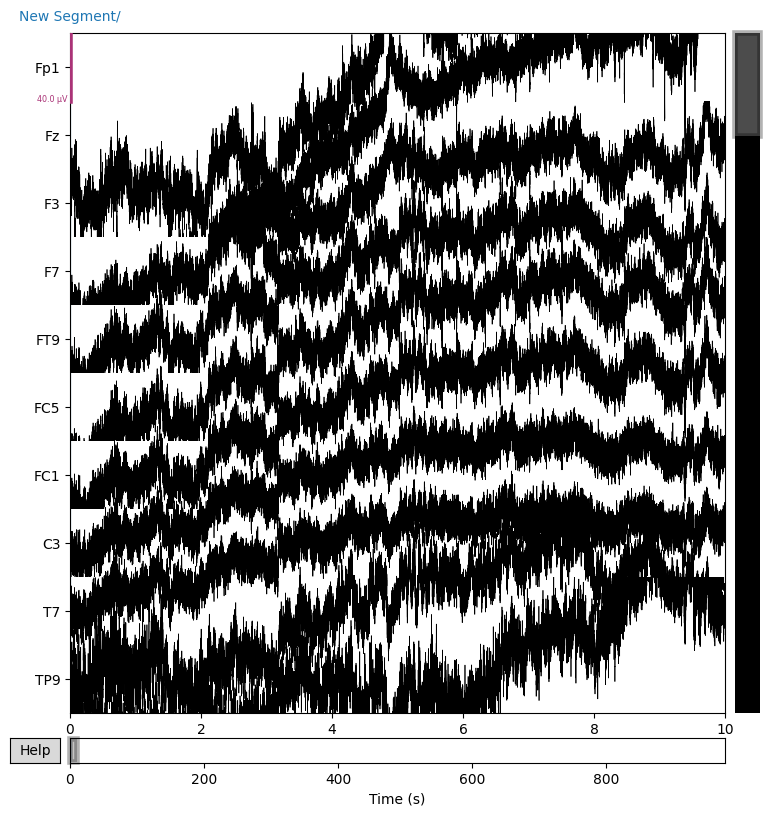

Reading 0 ... 9769499  =      0.000 ...   976.950 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 562.50 Hz)
- Filter length: 330001 samples (33.000 s)



<RawBrainVision | sub-01_task-daf_eeg.eeg, 66 x 9769500 (976.9 s), ~4.80 GB, data loaded>

In [10]:
raw_eeg_data = mne.io.read_raw_brainvision(local_vhdr, preload=False)
raw_eeg_data.plot(n_channels=10, title='Raw EEG Data', show=True)

# Load the data into memory before filtering
raw_eeg_data.load_data()

# Now you can apply the filter
raw_eeg_data.filter(l_freq=0.1, h_freq=500)

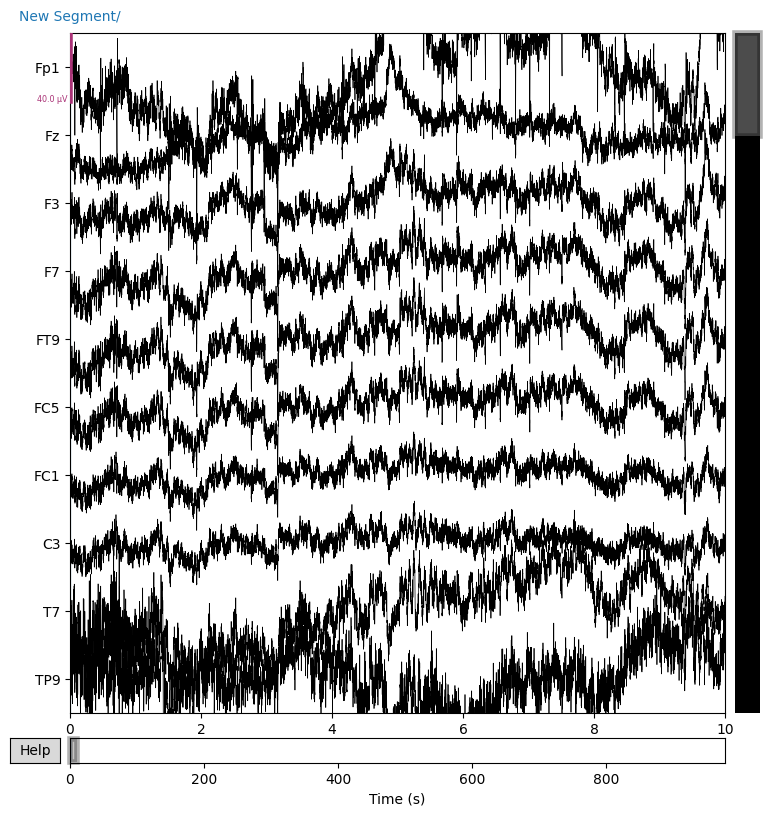

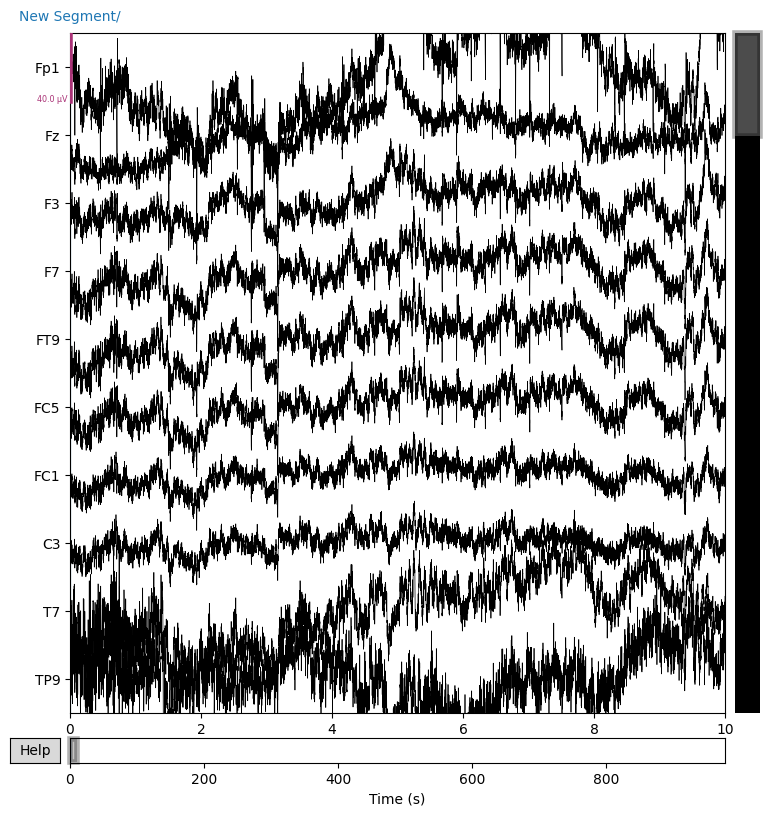

In [11]:
raw_eeg_data.plot(n_channels=10, title='Raw EEG Data', show=True)

In [12]:
raw_eeg_data.resample(1000)

<RawBrainVision | sub-01_task-daf_eeg.eeg, 66 x 976950 (976.9 s), ~492.0 MB, data loaded>

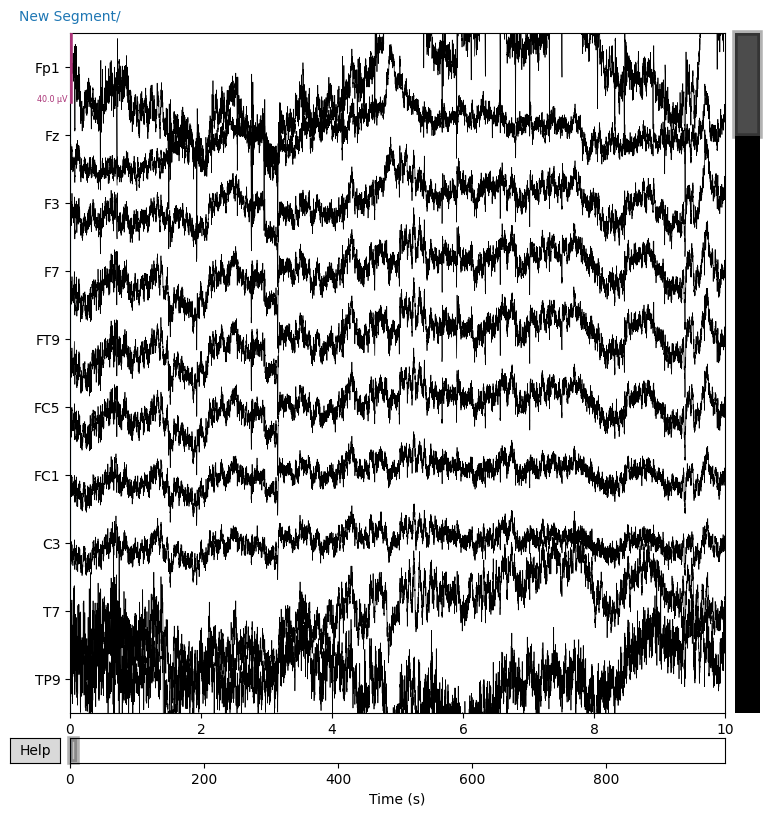

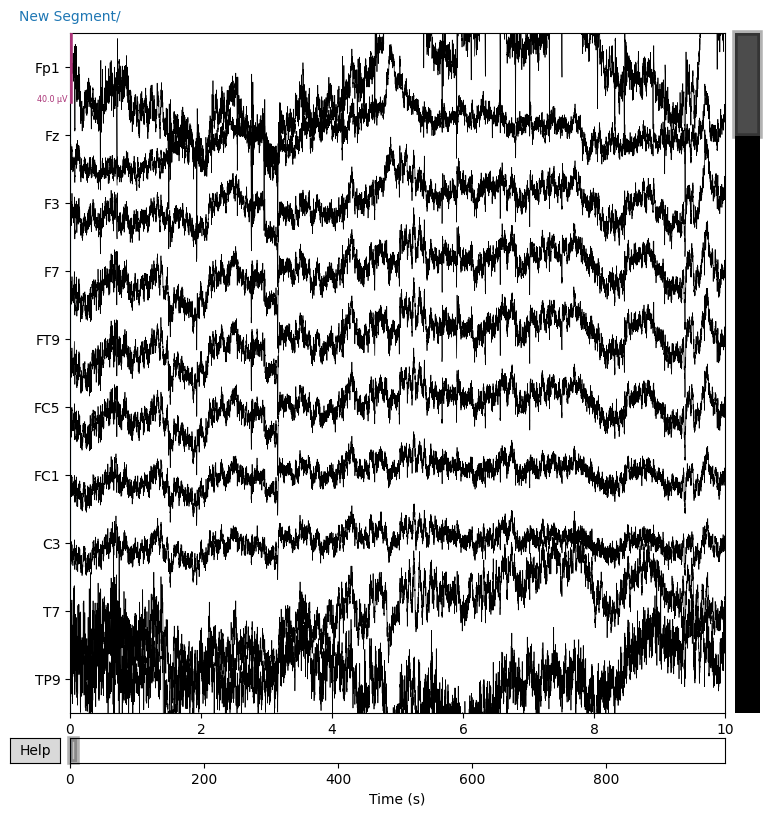

In [13]:
raw_eeg_data.plot(n_channels=10, title='Raw EEG Data', show=True)

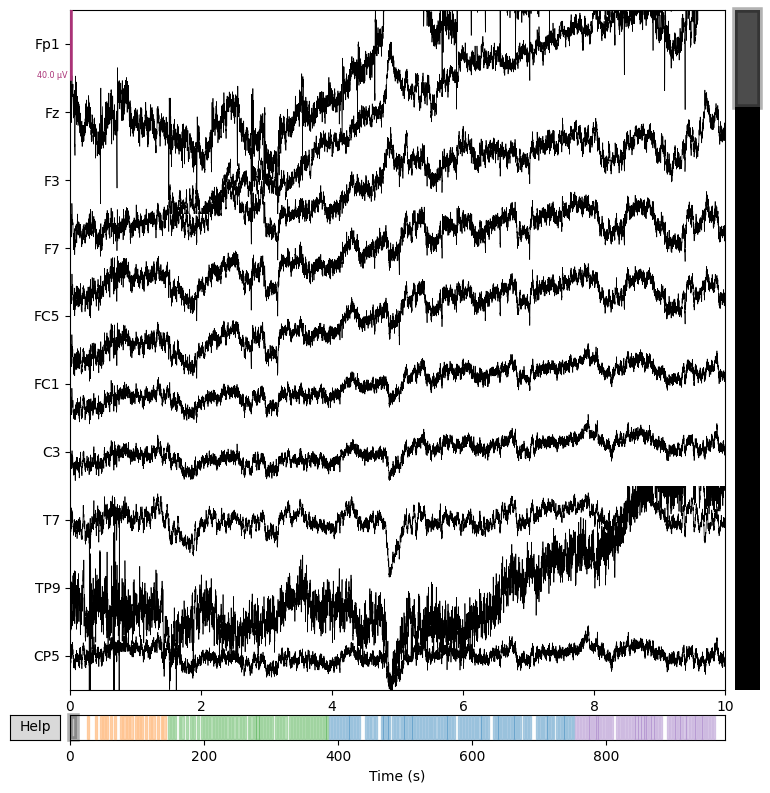

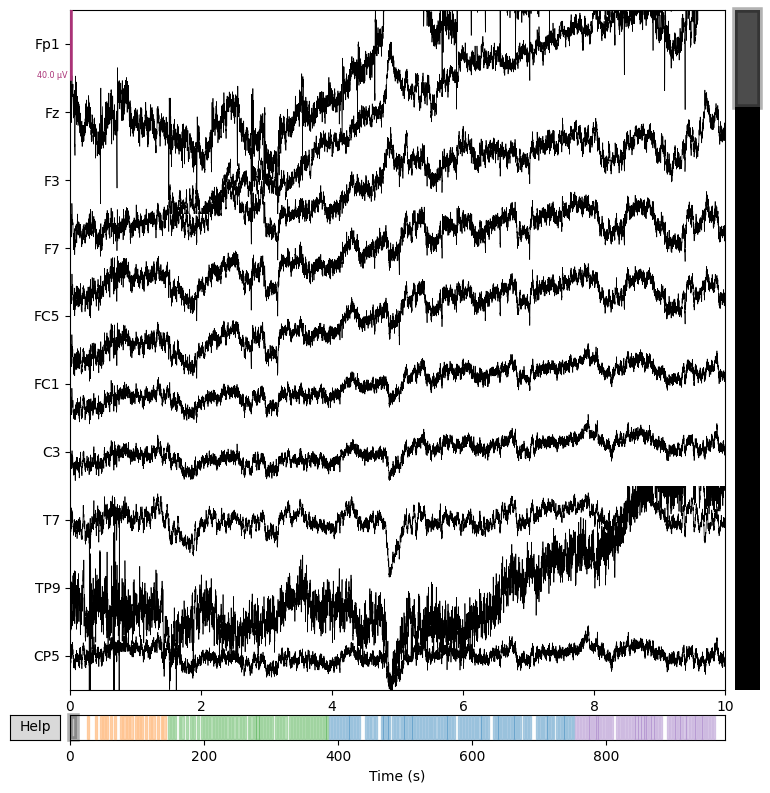

In [14]:
raw_fif.plot(n_channels=10, title='Raw EEG Data', show=True)

In [17]:
ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw_eeg_data)

Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 15 components


/home/takayukiono/Delayed-Auditory-Feedback-EEG/venv/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/tmp/ipykernel_36828/870796798.py:2: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (64) and smallest (1.1e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  ica.fit(raw_eeg_data)


Fitting ICA took 132.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,800 iterations on raw data (976950 samples)
ICA components,15
Available PCA components,66
Channel types,eeg
ICA components marked for exclusion,—


In [19]:

eog_indices, eog_scores = ica.find_bads_eog(raw_eeg_data)

RuntimeError: No EOG channel(s) found